## Analysis of 18F-FDG administration system

An FDG-PET scan  (https://en.wikipedia.org/wiki/Positron_emission_tomography) is a routine diagnostic examination often used within clinical oncology. A PET scan is performed by injecting patients with an amount of radioactive 18F atoms that have been coupled to a glucose like molecule.  To administer the radioactive substance to the patient the hospital makes use of an automatic infusion system  similar to the one shown in the figure on the left. Within the infusion system a lead shielded vial of the radioactive 18F-FDG is stored and for each patient the right amount of radioactive tracer is dispensed. After the infusion the system automatically returns a report containing some information about the patient specific infusion process. An example of such a report is shown in the figure to the right. A first inspection of a set of these reports shows that for each patient the administration curve looks different.  Unfortunately it happens that the infusion system breaks down, for instance due to mechanical wear of certain components. This has happened a couple of times in recent years and we are wondering if the information contained in the infusion curves can be used to extract a parameter that can be used to predict imminent failure of the machine.

In medical imaging it is standard to use the DICOM standard for medical images. 
A dicom file consists of an image and a header containing relevant metadata of the scan such as patient name, name of the scanner etc.
The following code shows how to import and access the image and metadata part of a dicom file:

In [1]:
import pydicom as dcm
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from os.path import dirname, join


In [101]:
sample = "anon_00a990e5-9e78-40f5-bf66-e4bf4af66d57"
myintego = dcm.read_file('Integodata/' + sample )
print(myintego)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0012) Instance Creation Date              DA: '20180504'
(0008, 0013) Instance Creation Time              TM: '085254'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 2.16.124.113531.4.7.1525416776716.1447737627.3
(0008, 0020) Study Date                          DA: '20180504'
(0008, 0021) Series Date                         DA: '20180504'
(0008, 0023) Content Date                        DA: '20180504'
(0008, 0030) Study Time                          TM: '000000'
(0008, 0031) Series Time                         TM: '085256'
(0008, 0033) Content Time                        TM: '085256'
(0008, 0050) Accession Number                    SH: '0253057269'
(0008, 0060) Modality                            CS: 'PT'
(0008, 0064) Conversion Type               

The pixel data is stored under the tag '7fe0,0010' but can also be accessed through the shortcut attribute "pixel_array":

In [102]:
img = myintego.pixel_array 


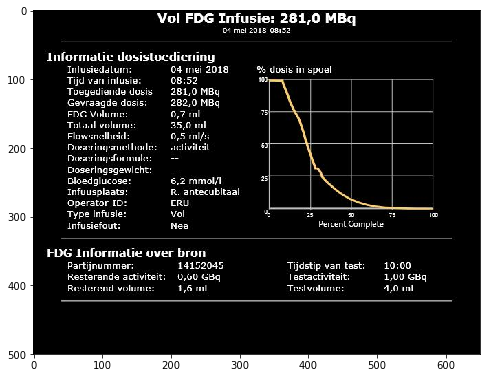

In [103]:
fig=plt.figure(figsize=(8, 8))
plt.imshow(img)

Below is a very simple function to extract the curve from the above image by looking in the right area and simply determining where the highest pixel intensity occurs.

In [104]:
def get_curve(medradarr):
    curveraw = medradarr[95:300,343:500,0]
    Y = []

    for i in range(np.shape(curveraw)[1]):

        Y.append(np.round(200 - np.argmax(np.convolve(curveraw[:,i],[5,5],mode='same')))) # of course you can change the convulution to obtain better results

    Y = Y/np.max(Y)

    return Y


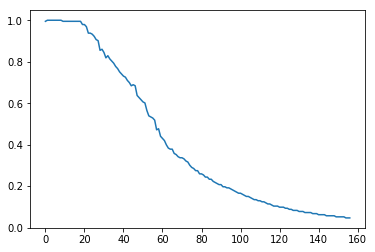

In [105]:
plt.plot(get_curve(img))

The big challenge now is that the image also contains additional text information about the dose used which is not in the dicom header but might be useful to us. Specifically there is a difference between the amount of radioactive tracer administered to the patient and the amount that was requested by the operator. We will use OCR functionality to obtain the requested amount.

To run this on your own machine you will need to install the Tesseract OCR engine and install the python pyocr wrapper to use it from within a notebook.


In [106]:
# import ocr_lib as ocr
from matplotlib import pyplot as plt
import numpy as np
import os
from skimage.color import rgb2gray

import pyocr
import pyocr.builders


'130,0'

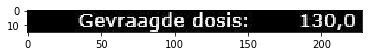

In [198]:

sec  = img[127:142,15:243]


plt.imshow(sec)


pytesseract.image_to_string(Image.fromarray(sec , 'RGB'), config= 'digits tessedit_char_whitelist=0123456789')
# pytesseract.image_to_string(Image.fromarray(rgb2gray(sec)))



Processing: anon_0032cdf1-4a48-445e-81ff-5f1ab69785a0
20180409 120.52639770507812
Sit mte
Processing: anon_00786ab3-1003-4320-a7f9-c188532f9439
20171128 108.48280334472656
108,0
Processing: anon_008ad194-ccaf-4cfc-94c8-c6ae43cbcaa2
20180717 252.75570678710938
252,0
Processing: anon_0092ef22-f207-4967-a70c-87f375eed98a
20180702 143.13009643554688
144,0
Processing: anon_00a990e5-9e78-40f5-bf66-e4bf4af66d57
20180504 281.0486145019531
282,0
Processing: anon_00b0e2dd-29db-4f64-ace1-6eb5f7b75cc3
20180403 188.0198974609375
Baslemen
Processing: anon_00d1fdfc-f447-4f5d-a93a-16190c02e644
20180814 133.785400390625
136,0
Processing: anon_011122ce-0904-4008-93d4-62a56437fb3d
20180601 155.33990478515625
Biel mtn
Processing: anon_0114c20e-be0f-4173-b692-3fb596a21243
20180821 130.0550994873047
130,0
Processing: anon_012b5cfd-40ca-4057-a591-fd123a371c87
20180601 129.79420471191406
130,0
Processing: anon_012f86b1-8002-4b25-9fc4-af15487f6213
20180910 103.84829711914062
Shtvamte
Processing: anon_01780bae-

Bid: t lt
Processing: anon_118d72cb-34ef-4fdb-84c2-f7f7eb8a0ef1
20180611 161.71929931640625
164,0
Processing: anon_11b75931-e853-4a40-9c99-bc761cd72aab
20180116 168.7436981201172
Sistemi
Processing: anon_1291559a-443f-4e19-9bb9-1091e08fbc8d
20171201 163.7191925048828
Sasemte
Processing: anon_129f84d8-89f0-42b1-aea8-ac86ebced7d3
20180306 134.90589904785156
136,0
Processing: anon_12ace07e-f653-4c90-aee6-15a0baa8b668
20180419 240.1114044189453
alee
Processing: anon_12b149a2-7529-44f2-b170-242cfb014ece
20180820 132.70849609375
136,0
Processing: anon_12f85987-718b-4fdb-82d9-51b80c8a4a95
20180110 233.4853057861328
vive
Processing: anon_1314f057-0ad7-4bfb-ad6c-8fd6ad952e11
20180205 141.8917999267578
142,0
Processing: anon_13537db0-7abd-4457-8218-eaa9b7f1803f
20180705 125.62539672851562
130,0
Processing: anon_1359d408-59c9-4b01-b32b-ca20c5d2ee03
20180109 262.7840881347656
264,0
Processing: anon_13734ce9-3ca0-4fea-87e7-99d19698dcdc
20180530 109.63520050048828
Se aemtn
Processing: anon_13833e3f-

oor ee
Processing: anon_21a3584e-c237-4f7a-be62-71ca4b5fa812
20180507 151.4897003173828
152,0
Processing: anon_21e24e9e-95de-4f85-8509-1a02019ad98d
20180517 130.65640258789062
130,0
Processing: anon_21fbc0b2-7686-459c-96be-5f3c90474b76
20171102 1303274.0
130.0 MBc
Processing: anon_225e0d66-7491-4ed6-a49f-771f1652e867
20180514 140.83140563964844
Sele men
Processing: anon_226cc630-d1f4-4d47-9ba8-5095dd2b12a8
20180419 232.9530029296875
vive
Processing: anon_227ceaae-9a1b-424f-812c-563d11ca5c84
20180910 314.64208984375
314,0
Processing: anon_22d4e1bc-aa07-4421-988a-d691ec12b65c
20171129 96.41661834716797
cette
Processing: anon_22ef5308-e1c3-446d-94cc-59aff1b2f90f
20171205 248.5
250,0
Processing: anon_2347761e-3415-4625-b734-ddec56eb8b40
20180611 135.660400390625
136,0
Processing: anon_23a825ec-6bc6-46c8-9210-216ca58e3293
20180612 125.88490295410156
Siete
Processing: anon_23e1555b-26d4-4536-9c14-3cb479ecb813
20180417 166.9824981689453
168,0
Processing: anon_241e7f27-a5db-4d94-a0cb-c4effa9b9

284,0
Processing: anon_33828360-8d57-4a61-aea2-b4fe65217e04
20180504 232.6616973876953
234,0
Processing: anon_33beb4de-30fb-4a1c-b27a-d993fab1aee9
20171221 159.68040466308594
Sacltmtn
Processing: anon_341fe432-2b44-45e8-a6ba-8b83333a3490
20180320 102.96910095214844
104,0
Processing: anon_34329c3f-d0b8-4c3f-b534-fdf266b35a40
20171229 93.76927947998047
oor ee
Processing: anon_34542e2e-f482-4606-829e-2b0d3cff3104
20180109 239.1282958984375
238,0
Processing: anon_3475ea4e-d55a-4b68-9adc-189089702b40
20180816 155.09080505371094
Biel mtn
Processing: anon_34ab8599-cc76-4b03-bfa4-788719d74da9
20180117 235.0529022216797
234,0
Processing: anon_34bf92ac-997e-4daa-9932-cc67be903cf2
20180323 106.61160278320312
106,0
Processing: anon_34f09674-cb5b-4156-af67-3d2d1a5c0b02
20180719 137.9687957763672
Se Teme
Processing: anon_35586f92-e4c6-4e96-8c10-ca7b94bc6e9e
20180725 165.22959899902344
Sac mtn
Processing: anon_35601265-0f25-4e89-a513-5d9c5a80aac0
20180627 137.5570068359375
138,0
Processing: anon_3581

Si: mtn
Processing: anon_454834e3-4be7-4bb1-88e2-bce73d503e97
20171212 129.98269653320312
Svante
Processing: anon_45b67893-e77c-4362-b11c-77aa8675abd7
20180202 158.9866943359375
158,0
Processing: anon_45c7d40c-28f3-43cd-9c5e-495ac7289f8d
20180108 176.41000366210938
Swine
Processing: anon_45cf77d8-9c21-48cc-879c-b20b31868e3c
20180312 154.93580627441406
Siete mte
Processing: anon_45dfc0f8-47ff-4c88-8eb2-856b36767057
20180529 170.26080322265625
Si stmte
Processing: anon_4607d8f4-3753-47fd-8500-a2345d682d0d
20180625 169.16879272460938
Si stmte
Processing: anon_460f084a-8abf-47e2-abad-5a6baa90a1a7
20180111 129.4044952392578
Siete
Processing: anon_4647bed0-0aa1-4617-b553-8211b03ba966
20180424 155.90859985351562
158,0
Processing: anon_46562a24-a488-4d06-978c-a9cddeb241c4
20180905 171.9875030517578
cent
Processing: anon_4658a974-2dd3-4c1e-82e4-68d488a6e364
20180425 232.73789978027344
234,0
Processing: anon_46804c37-e05f-4bf4-8c35-847188cd66bb
20180220 139.16650390625
Sele men
Processing: anon_

168,0
Processing: anon_539042b1-5bc8-4ab5-b451-aea3fee9dce8
20180628 161.08779907226562
Saye
Processing: anon_53aacee2-4566-42e6-8d6c-8e4bf9219068
20180302 244.12179565429688
246,0
Processing: anon_53c71af2-f8e4-4106-a9a0-1b62c42a127b
20180116 120.0459976196289
Sit mtn
Processing: anon_53e254e4-18e0-4442-a77c-6d7404327b0c
20180511 248.6558074951172
250,0
Processing: anon_53ebe862-e3ed-4e56-9a49-72066ea756f7
20180801 150.6793975830078
Boel) mtn
Processing: anon_5489ea6d-889b-470b-a45e-7c16f52a9ea3
20180803 231.71080017089844
234,0
Processing: anon_549804c3-cf69-408f-b40e-5c3942fca5ac
20180410 156.2301025390625
Boel mtn
Processing: anon_54b3e634-eb16-4e11-afe3-5177fb2753ec
20180426 119.16490173339844
124,0
Processing: anon_54fe9ed0-4df7-4b2d-b6ee-9b53b12e920e
20180716 151.38900756835938
152,0
Processing: anon_550266ec-99c1-441e-ae38-e1050c64e6d3
20171219 156.03179931640625
156,0
Processing: anon_550b4f72-5138-4910-b249-6ee42e337110
20180226 173.93130493164062
174,0
Processing: anon_55247

Sime
Processing: anon_65a0d10e-d88d-4ac9-af00-855a1af7cca6
20171215 234.1616973876953
alee
Processing: anon_65b37c0e-c8ab-4aec-95d1-ed434b0af6ce
20180509 164.0673065185547
Saslemtn
Processing: anon_65c7967f-5b40-4d58-a4c5-08c5906792e5
20180201 249.3511962890625
250,0
Processing: anon_6675d64c-bdc8-4bda-8585-87d1985c3f0a
20180208 172.60719299316406
Sent
Processing: anon_66e6a399-3495-422a-aca7-c731239f2a0f
20180221 170.1082000732422
Simin
Processing: anon_670b7f9b-f5b5-41a3-8cf4-b86823dbfaf4
20180213 164.97950744628906
BS aclemtn
Processing: anon_670be0a8-70f7-412e-b719-e00def176997
20171207 120.50569915771484
Sit mte
Processing: anon_6737af47-8d63-405e-88c6-0b462238feb6
20180814 159.62350463867188
Sst mtn
Processing: anon_6789179c-1795-4cf6-ae0e-a7dbc0ece534
20180905 130.4237060546875
130,0
Processing: anon_678fe2bc-5271-4371-ba7c-af768facc2e5
20180528 158.25379943847656
Sslmtn
Processing: anon_67a973f9-4b39-48bc-bc21-fdec31f1f93b
20170817 1463611.0

Processing: anon_67c32dd2-830b-4ee2

262,0
Processing: anon_77ab94ad-913b-4b79-91ae-b6696e5fc22d
20180810 157.8125
Salt mtn
Processing: anon_77adc3fe-cb32-46ba-b9cf-5d5b12d3de2e
20180424 150.518798828125
S eelt mtn
Processing: anon_77bc8071-955a-4500-87e3-6cc9f3b4cee8
20180817 149.6761016845703
S eelt mtn
Processing: anon_77eda4f1-2422-4e02-988d-3e1f4fc4c4f2
20171205 152.8614959716797
154,0
Processing: anon_77f57e11-2187-4df1-8721-13d95c1b31e5
20180827 162.69180297851562
Sayin
Processing: anon_780bb6cd-4e94-43a0-9b51-422f4013a278
20180125 147.4499969482422
146,0
Processing: anon_780f5538-6c4e-4865-85e4-063dc2e39e62
20180802 168.24659729003906
Stn
Processing: anon_781d50ae-2d59-427e-bde1-61a435aafd12
20180504 114.6259994506836
114,0
Processing: anon_78331cf7-79e6-4b1f-b148-063909ea5e26
20180117 135.8509979248047
136,0
Processing: anon_78331fd0-5e64-4f24-a8a7-9ffbb4667f5a
20170802 1299219.0
130.0 MBc
Processing: anon_78a01525-8fc9-4d6d-9f78-0c88c6231b12
20180216 125.15080261230469
Si: mtd
Processing: anon_78fff6d3-8465-4ccb

Si: mtn
Processing: anon_875cfa3b-f845-467c-b28c-58673e332024
20180601 269.8109130859375
268,0
Processing: anon_87987d7e-489c-49df-b2fc-11852ddeec54
20180125 239.71270751953125
238,0
Processing: anon_87a34a80-d43e-4751-af90-c54763754b96
20180306 161.4987030029297
Sc mtn
Processing: anon_87cafa7b-3d63-448a-8f88-58026467c779
20180705 163.11709594726562
164,0
Processing: anon_87de1704-2bc8-4906-882a-99436f7d94cf
20171204 145.1199951171875
146,0
Processing: anon_881c1896-46fc-4a1b-b1de-ad98b477d1ca
20180627 97.9119873046875
Beelemen
Processing: anon_884759b7-201c-4d33-acf0-7168f36095d0
20180305 162.1992950439453
164,0
Processing: anon_884895da-5d56-4d1a-afd7-43983c37fa42
20171228 147.34280395507812
146,0
Processing: anon_88616b49-b687-489e-8438-103d87c34795
20171129 251.9199981689453
256,0
Processing: anon_88665453-2f2d-4e5a-9915-db9d9cef9fa7
20180208 157.43800354003906
158,0
Processing: anon_88931a03-c56b-4203-8800-097f426572d8
20171215 125.8115005493164
Siete
Processing: anon_889febdc-85

108,0
Processing: anon_9783bafd-37f6-4c08-b179-6f227cb7cfd0
20180827 157.3206024169922
156,0
Processing: anon_978cb7b3-1e1b-4f34-a97d-ecd38962d251
20180327 259.4906005859375
Vive
Processing: anon_97928c1d-91c1-421e-b71e-06a43869b2a5
20180618 156.52149963378906
Saslmtn
Processing: anon_97a806dd-c4fa-4946-bc95-a4a619e464ae
20171213 154.5594024658203
154,0
Processing: anon_99221406-063e-479d-8749-6ecfd060e275
20180814 140.80580139160156
Sele men
Processing: anon_999d0c1f-66ae-4938-89af-69f0c0f27089
20180118 158.73629760742188
Sasltmtn
Processing: anon_999fe461-ef17-49e7-b36e-4200f621507a
20180725 170.2274932861328
170,0
Processing: anon_99ab8c6a-6333-44b0-b18d-e1c01a230136
20180807 250.35499572753906
250,0
Processing: anon_99e52c36-f2b1-4374-9829-e295e6dac97e
20180205 160.73150634765625
Saclmtn
Processing: anon_9a1f8240-23ea-4dd7-b98d-db32a6605f06
20180522 154.33270263671875
156,0
Processing: anon_9ad2f977-57ac-4140-b540-d0cc10b914f4
20171229 163.42300415039062
164,0
Processing: anon_9ade

234,0
Processing: anon_aa3fe8ee-7de2-44a7-b825-b1909feec0e1
20171123 107.59159851074219
Bhélo men
Processing: anon_aa5081df-5d71-458d-b640-c90d331d2af9
20180430 163.9582977294922
164,0
Processing: anon_aae9adf2-92f2-40a3-b889-7921052a1215
20180419 193.3804931640625
Site
Processing: anon_aaead890-4f15-49cd-8775-5a895695fab4
20180417 270.9198913574219
Vrs in
Processing: anon_ab33abfe-d6fa-420e-9272-7bfb21f34167
20180711 133.12159729003906
134,0
Processing: anon_ab385fb0-b654-4370-9efd-6c95862405a6
20180809 173.281005859375
Swot
Processing: anon_ab3e1ab7-f303-4a03-8887-250858950a82
20180816 109.2322998046875
Se aemtn
Processing: anon_ab45ada3-c87f-4417-b4f6-3d3fa3c8b7df
20171218 171.44630432128906
Sent
Processing: anon_ab8ca793-44e2-4ca4-8c23-cbf5d5d6845c
20180501 147.17269897460938
Boel) mtn
Processing: anon_abe0e808-262b-4543-9b81-b5b610054f92
20180604 106.4291000366211
108,0
Processing: anon_ac0cb41e-3d9c-4fc8-9200-6232b727d01d
20180307 179.4053955078125
BE:i0 mtn
Processing: anon_ac49

118,0
Processing: anon_bd5f0227-6ab1-44ac-9466-0b6513fad3e9
20180314 235.96719360351562
236,0
Processing: anon_bd618371-c28e-44f4-badf-fbeb7c0c4dc1
20180312 167.3155975341797
168,0
Processing: anon_bd6eec33-2ffd-4fdc-852a-9da19254b137
20180219 166.8831024169922
166,0
Processing: anon_bd719961-b1a4-4732-ac57-b0aa533a2b67
20180716 124.7240982055664
124,0
Processing: anon_bda8fa97-35d7-43ff-919f-5a6ef1b20318
20171214 119.96869659423828
Sit
Processing: anon_bdbb6570-29f8-440e-b531-80c3e53e1b9d
20180424 235.14520263671875
236,0
Processing: anon_bde4acaf-5c26-4acf-9b19-a3d5872af65e
20180502 241.87860107421875
240,0
Processing: anon_be2d870d-87d5-4f48-aa2e-06d1b5d6b4c5
20180619 140.03370666503906
Sele men
Processing: anon_be4769bb-4a8f-41b5-bce0-545a8b8f63e4
20180725 160.0260009765625
Sc mtn
Processing: anon_beade38d-b646-44bb-85ec-3e6d2952ac18
20180703 119.46980285644531
Set
Processing: anon_bec8fb3b-29eb-40b7-aa6c-d500ed128ddd
20180308 217.0950927734375
Vales
Processing: anon_bf3e8094-6b21-

S oelt mtn
Processing: anon_cc513128-74f4-4551-9ef0-3be6dc9f0788
20171207 159.61639404296875
Sst mtn
Processing: anon_cc73fc06-5aea-4d13-972f-506c5b444c52
20180726 145.30189514160156
Sc Tome
Processing: anon_cc7b8782-c4aa-4c87-aace-bcb980c151b9
20180501 154.8751983642578
Siete mte
Processing: anon_cc862fe3-fedb-43e1-bf49-9e87eff45eee
20180702 151.55810546875
152,0
Processing: anon_cc9a108b-30bf-43e9-8936-5286b73bc2f1
20180322 161.57449340820312
Sisymte
Processing: anon_cc9d9a7f-a4c2-4d7a-be65-026d264af9e6
20180828 165.98350524902344
166,0
Processing: anon_ccb959f1-d9cf-4667-bf29-085a36b605aa
20171207 178.4853057861328
Swiemte
Processing: anon_ccc7246a-1f2e-4667-a63a-1ad37fd401a0
20180201 107.12809753417969
106,0
Processing: anon_ccd0ef99-665a-4d55-9516-ec7938a16849
20180905 162.03799438476562
Sct mtn
Processing: anon_cd52a5bd-814b-4f8e-ab93-2ce7f027a785
20180223 170.1719970703125
Sent
Processing: anon_cd5d0b09-bb76-4d8e-a3b1-eaba3c1be3b6
20171219 164.9022979736328
Saclemtn
Processing: 

174,0
Processing: anon_def2b894-b9a0-4b05-89ba-d44704eb6634
20180105 140.23300170898438
Se lemen
Processing: anon_df12e52b-a743-4773-a048-eb6680795620
20180423 311.5162048339844
310,0
Processing: anon_df353bd5-54c5-460b-b1a6-8ae964a03eaa
20180615 97.18472290039062
coy Oe
Processing: anon_df440b0f-d4a1-4c02-ab06-cd3c7c76a839
20180716 316.4873046875
vane
Processing: anon_df5f555a-caa2-4d1b-be3c-b8162d4d4039
20180213 142.50469970703125
142,0
Processing: anon_df8964ce-ecef-4ad9-aff1-c7be0c0e45bd
20180111 117.92160034179688
118,0
Processing: anon_dfacd070-6625-48f3-b322-f4de8ebcfc2c
20180117 298.55120849609375
val mon
Processing: anon_dfc415e6-881c-429c-98fc-ffecf1c369e5
20180524 254.5084991455078
256,0
Processing: anon_dff41192-00ac-41a1-8edb-d57d01f5cdef
20180216 159.5941925048828
Sst mtn
Processing: anon_e0059cff-f6f4-4ddb-952e-6a024abf753d
20171228 145.22779846191406
144,0
Processing: anon_e0118044-a129-4905-b1fc-df537e800cb1
20180626 233.30850219726562
234,0
Processing: anon_e0186c75-1

20180711 133.0402069091797
134,0
Processing: anon_ed0a5b55-e89d-4485-a585-cb49121ef928
20180905 250.9770050048828
250,0
Processing: anon_edce9ee5-af8e-4a3f-b04f-a0da74bbeb68
20180814 157.26480102539062
Sc mtn
Processing: anon_ee5c7bce-905c-4ce2-8d75-380c65d0850d
20171212 164.5782928466797
BS aslemtn
Processing: anon_ee66561e-0d1e-45c4-b82a-f249f317b8f7
20180124 102.85130310058594
Shtvamte
Processing: anon_ee82150e-a98e-4809-af49-aa387a6b2497
20180216 151.9033966064453
152,0
Processing: anon_ee9945df-86a3-41e5-adbe-57f0a2d15a06
20180419 98.18006134033203
oo Oe
Processing: anon_ee9e5d10-75ac-42b7-bed4-13c3bd13d50c
20180104 150.70989990234375
Sv
Processing: anon_eeaec8e5-0f1c-4eda-a406-e9aaf7fedb18
20180319 130.13909912109375
Svante
Processing: anon_eebe583b-d65b-46c3-aecb-36365c5caee8
20180807 237.4980926513672
238,0
Processing: anon_eee5ec4b-cf16-4381-bb3d-062384d608d9
20180330 152.14610290527344
152,0
Processing: anon_eeea3b43-4a90-4092-ac54-84f4bba5a650
20180326 273.36248779296875
278

Vrs ie
Processing: anon_fcdac10e-bc5f-4a25-8314-d9a0e4a92c11
20171101 1336127.0
132.0 MBc
Processing: anon_fd0267fd-0104-48c1-bc30-b1690c9288a2
20180504 115.2782974243164
Senemtn
Processing: anon_fd0577d7-1933-4c3a-92b1-7034ba4cf83c
20180116 126.09500122070312
Siete
Processing: anon_fd0f7231-728e-43ef-b85e-55eafa799b28
20180312 119.82319641113281
Sit te
Processing: anon_fd31f5a6-7334-4834-ad24-aa5cb5dd44f3
20171116 105977.0
BRClemOm lat
Processing: anon_fd4e8dc2-bd9d-484b-a3f5-4487860f9b06
20171227 283.9313049316406
284,0
Processing: anon_fda41f20-2fe7-4d6a-9ea6-dc760105a4be
20171227 116.11750030517578
Senne
Processing: anon_fdc9a207-251b-4481-a3c3-249b6315d4ad
20180125 244.20700073242188
246,0
Processing: anon_fddc8fb9-691f-440b-a047-9e841889ac34
20180102 118.83059692382812
Simin
Processing: anon_fe0fe6bc-140d-4788-95af-c19f5d61383b
20180801 170.8052978515625
Sst mte
Processing: anon_fe4ddd8e-0031-43d1-bf06-df373f3619d2
20180531 99.77043914794922
Shtvamte
Processing: anon_feacaa2b-376

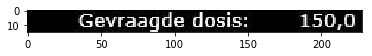

In [206]:

datadir = "Integodata/"

results = []

for filename in os.listdir(datadir):
    print('Processing:',filename)

    tmpdcm = dcm.read_file(datadir + filename)
    tmparr =  tmpdcm.pixel_array
    tmpcurve = get_curve(tmparr)
    
    tmpdims = np.shape(tmparr)
    tmparr = np.reshape(tmparr,(tmpdims[1],tmpdims[2],tmpdims[0])) 
    tmpdate = tmpdcm.StudyDate


    admdose = tmpdcm['0051','5102'].value

    print (tmpdate,admdose)


    try:
#         arr = tmpdcm.pixel_array
#         arr= arr.reshape(500,650,3)
        img = tmpdcm.pixel_array
#         img_gray=rgb2gray(arr)
            
        #ocrres = ocr.OCR(img_gray,[500-200,650-111,40,40])
#         ocrres = ocr.OCR(np.transpose(img_gray),[198,127,45,15])
        sec  =img[127:142,15:243]
        plt.imshow(sec)
        ocrres= pytesseract.image_to_string(Image.fromarray(sec , 'RGB'), config= 'digits tessedit_char_whitelist=0123456789')
        
        print(ocrres)
        reqdose = float(ocrres.replace(',','.'))
        difdose = reqdose - admdose
        reldifdose = difdose/reqdose

    except:
        reqdose = None
        difdose = None
        reldifdose = None

        
   
    results.append([tmpdate,admdose,reqdose,difdose,reldifdose,tmpcurve])


In [122]:
results

[['20180409',
  120.52639770507812,
  None,
  None,
  None,
  array([0.99481865, 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 0.99481865, 0.98963731, 0.98963731, 0.95854922,
         0.95854922, 0.94818653, 0.93782383, 0.90673575, 0.87046632,
         0.87046632, 0.85492228, 0.84974093, 0.8134715 , 0.79792746,
         0.79274611, 0.78238342, 0.78238342, 0.77720207, 0.77720207,
         0.77720207, 0.77720207, 0.77202073, 0.77202073, 0.76683938,
         0.75129534, 0.74611399, 0.75129534, 0.69430052, 0.68911917,
         0.67357513, 0.6373057 , 0.62176166, 0.60103627, 0.60621762,
         0.57512953, 0.54404145, 0.55440415, 0.51813472, 0.50259067,
         0.45595855, 0.47150259, 0.44041451, 0.41968912, 0.38860104,
         0.37823834, 0.37305699, 0.34196891, 0.32642487, 0.33678756,
         0.31606218, 0.29533679, 0.30569948, 0.28497409, 0.2746114 ,
         0.2642487 , 0.24870466, 0.25388601

In [207]:
import pandas as pd

In [214]:
df = pd.DataFrame(np.array(results), columns=['tmpdate','admdose','reqdose','difdose','reldifdose','tmpcurve'])
df

,tmpdate,admdose,reqdose,difdose,reldifdose,tmpcurve
0,20180409,120.526,None,None,None,"[0.9948186528497409, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,20171128,108.483,108,-0.482803,-0.0044704,"[0.9948186528497409, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,20180717,252.756,252,-0.755707,-0.00299884,"[0.9948186528497409, 1.0, 1.0, 0.9948186528497..."
3,20180702,143.13,144,0.869904,0.006041,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,20180504,281.049,282,0.951385,0.00337371,"[0.9948186528497409, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
5,20180403,188.02,None,None,None,"[0.9948186528497409, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
6,20180814,133.785,136,2.2146,0.0162838,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
7,20180601,155.34,None,None,None,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
8,20180821,130.055,130,-0.0550995,-0.000423842,"[0.9948186528497409, 1.0, 1.0, 0.9948186528497..."
9,20180601,129.794,130,0.205795,0.00158304,"[0.9948186528497409, 1.0, 0.9948186528497409, ..."


In [209]:
df['reqdose'].isna().sum()

759

In [211]:
df_clean = df.dropna(axis=0, how='any', subset=['reqdose'])

In [212]:
df_clean

,tmpdate,admdose,reqdose,difdose,reldifdose,tmpcurve
1,20171128,108.483,108,-0.482803,-0.0044704,"[0.9948186528497409, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,20180717,252.756,252,-0.755707,-0.00299884,"[0.9948186528497409, 1.0, 1.0, 0.9948186528497..."
3,20180702,143.13,144,0.869904,0.006041,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,20180504,281.049,282,0.951385,0.00337371,"[0.9948186528497409, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
6,20180814,133.785,136,2.2146,0.0162838,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
8,20180821,130.055,130,-0.0550995,-0.000423842,"[0.9948186528497409, 1.0, 1.0, 0.9948186528497..."
9,20180601,129.794,130,0.205795,0.00158304,"[0.9948186528497409, 1.0, 0.9948186528497409, ..."
12,20180523,138.494,138.3,-0.193698,-0.00140056,"[0.9948186528497409, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
14,20180301,135.885,136,0.114899,0.000844843,"[0.9948186528497409, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
16,20180820,246.448,250,3.5518,0.0142072,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [215]:
import pickle
with open('2b.pickle', 'wb') as handle:
    pickle.dump([df,df_clean], handle, protocol=pickle.HIGHEST_PROTOCOL)